In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load MNIST dataset
(train_images,train_labels1),(test_images,test_labels1)=fashion_mnist.load_data()

#preprocess the data
train_images=train_images.reshape((60000,28,28)).astype('float32')/255
test_images=test_images.reshape((10000,28,28)).astype('float32')/255

train_labels=to_categorical(train_labels1)
test_labels=to_categorical(test_labels1)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Each image is 28x28 pixels
inputs=Input(shape=(28,28))#input layer
rnn_layer=LSTM(512)(inputs)#hidden layer1
outputs=Dense(10,activation='softmax')(rnn_layer)#output layer
model=Model(inputs,outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 lstm (LSTM)                 (None, 512)               1107968   
                                                                 
 dense (Dense)               (None, 10)                5130      
                                                                 
Total params: 1113098 (4.25 MB)
Trainable params: 1113098 (4.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history=model.fit(train_images,train_labels,validation_split=0.1,epochs=15,batch_size=64)

Epoch 1/15
844/844 [==============================] - 455s 528ms/step - loss: 0.6046 - accuracy: 0.7747 - val_loss: 0.4573 - val_accuracy: 0.8287
Epoch 2/15
844/844 [==============================] - 422s 500ms/step - loss: 0.4169 - accuracy: 0.8458 - val_loss: 0.3659 - val_accuracy: 0.8605
Epoch 3/15
844/844 [==============================] - 422s 500ms/step - loss: 0.3588 - accuracy: 0.8658 - val_loss: 0.3428 - val_accuracy: 0.8700
Epoch 4/15
844/844 [==============================] - 424s 502ms/step - loss: 0.3243 - accuracy: 0.8799 - val_loss: 0.3269 - val_accuracy: 0.8793
Epoch 5/15
844/844 [==============================] - 424s 502ms/step - loss: 0.2972 - accuracy: 0.8887 - val_loss: 0.3220 - val_accuracy: 0.8753
Epoch 6/15
844/844 [==============================] - 426s 505ms/step - loss: 0.2781 - accuracy: 0.8974 - val_loss: 0.3034 - val_accuracy: 0.8875
Epoch 7/15
844/844 [==============================] - 422s 500ms/step - loss: 0.2583 - accuracy: 0.9025 - val_loss: 0.2862 -

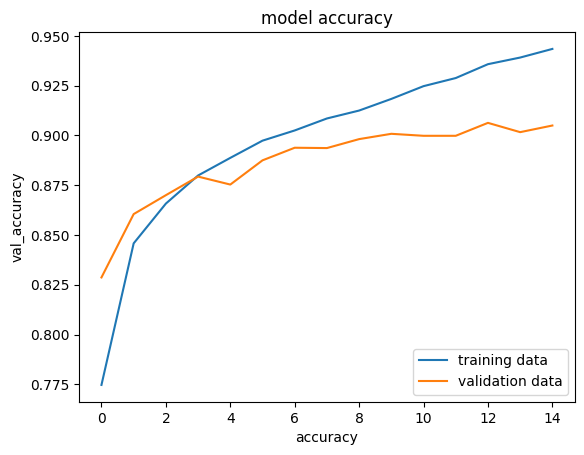

In [ ]:
#model_accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('val_accuracy')
plt.legend(['training data','validation data'],loc='lower right')
plt.show()

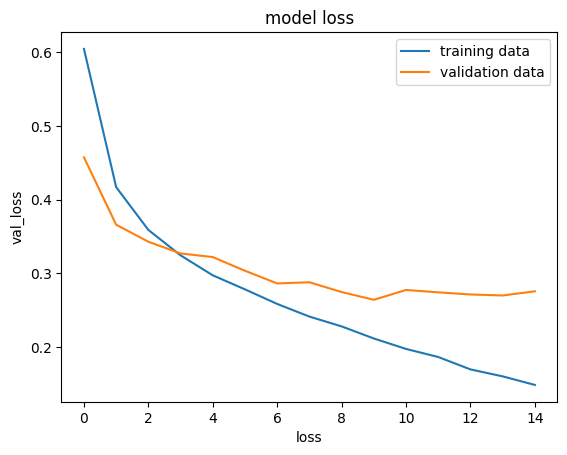

In [ ]:
#model_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend(['training data','validation data'],loc='upper right')
plt.show()

In [ ]:
y_pred=model.predict(test_images)
y_pred

313/313 [==============================] - 25s 78ms/step


array([[7.85516204e-06, 1.92740936e-06, 2.56456269e-06, ...,
        6.05774461e-04, 8.95636063e-08, 9.99272108e-01],
       [1.65075413e-04, 1.87294560e-07, 9.99342382e-01, ...,
        2.67952629e-07, 1.00093168e-07, 2.37684094e-06],
       [4.98562578e-08, 9.99999464e-01, 1.64115868e-08, ...,
        8.39421777e-09, 3.43996365e-09, 3.03862642e-08],
       ...,
       [2.64710275e-06, 1.25127286e-07, 6.02823150e-07, ...,
        1.05809804e-07, 9.99994218e-01, 3.41913271e-08],
       [9.01845851e-07, 9.99975264e-01, 3.58888421e-08, ...,
        1.04576891e-07, 4.48934507e-08, 8.28639259e-07],
       [6.20760955e-04, 4.52319218e-05, 7.38786301e-04, ...,
        3.38825852e-01, 3.74385476e-04, 5.36312163e-03]], dtype=float32)

In [ ]:
test_labels

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
from sklearn.metrics import accuracy_score
#accuracy_score
accuracy_score(test_labels1,y_pred)

0.9035